# Homework 6 (more of a tutorial, really)

As I was browsing through Kaggle the other day, I came upon a brand new dataset from the University of Puerto Rico, which contains images of bees entering their hive.  The task is to determine automatically which bees are carrying pollen.  Your job will be to develop a convolutional neural network that performs this task.  

## 1. Load Data (0 pts)

First, we need to load the bee data, which is included along with this homework.  Fortunately, the authors of the Kaggle dataset provided a nice set of files which will do this for us, which I have reproduced below

In [1]:
import glob, os 
import sklearn
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
path="images/"
imlist= glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [4]:
# Load the dataset (may take a few seconds)
X,y=dataset(imlist)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

/Users/nicholasthiros/anaconda2/envs/tensorflow/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [5]:
# X has the following structure: X[imageid, y,x,channel]
print('X: ',X.shape)  # data
print('y: ',y.shape)  # target

print('Class 0: ',sum(y==0))
print('Class 1: ',sum(y==1))
print('Total  : ',len(y))

X:  (714, 300, 180, 3)
y:  (714,)
Class 0:  345
Class 1:  369
Total  :  714


We can plot a couple of the images below.  If you check out a couple of these, you will see that the visible difference when bees carry pollen is the presence of large fluffy balls of pollen on their back legs.

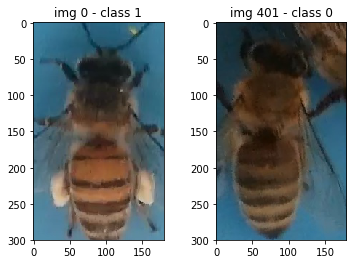

In [6]:
fig, axes = plt.subplots(1,2)
k=0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=401
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

## 2. A convolutional network architecture for bee classification (40 pts)

**Implement a 2D convolutional neural network using Keras.  You are free to choose whatever network architecture you like.**

You can find all the relevant syntax for implementing such a network [here](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py), the Keras convnet example for MNIST.

*(For the sake of comparison, I will share the one that I used:*

Layer 1: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 2: 4x4 Max-pooling layer

Layer 3: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 4: 4x4 Max-pooling layer

Layer 5: 5x5 convolution layer with 24 kernels and a relu activation function

Layer 6: 4x4 Max-pooling layer

Layer 7: Flattening layer

Layer 8: Dropout layer with 0.2 dropout probability

Layer 9: 1 node sigmoid layer


In [7]:
import keras
import keras.models as km
import keras.layers as kl

import numpy as np

input_shape = ((300,180,3))

model = km.Sequential()

model = km.Sequential()
model.add(kl.Conv2D(24, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))

model.add(kl.Conv2D(24, kernel_size=(5, 5), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))

model.add(kl.Conv2D(24, kernel_size=(5, 5), activation='relu'))
model.add(kl.MaxPooling2D(pool_size=(4, 4)))

model.add(kl.Flatten())

model.add(kl.Dropout(0.2))
model.add(kl.Dense(1, activation='sigmoid'))



Using TensorFlow backend.


## 3. Fitting the CNN to data (20 pts)

Compile your model, using a binary crossentropy loss function and an optimizer of your choosing (RMSprop worked well for me).  Select a batch size and number of epochs, and fit your model to the training data, while also keeping track of the test set accuracy.

**Plot the training and test accuracy of your model at each epoch.  Comment on whether you think the model is being overfit.**

In [8]:
model.compile(loss=keras.losses.binary_crossentropy,                
              optimizer=keras.optimizers.RMSprop(),           
              metrics=['accuracy'])

batch_size = 100                       
epochs= 50                      
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

Train on 571 samples, validate on 143 samples
Epoch 1/50
571/571 [==============================] - 181s 317ms/step - loss: 0.7044 - acc: 0.5236 - val_loss: 0.6886 - val_acc: 0.4895
Epoch 2/50
571/571 [==============================] - 175s 306ms/step - loss: 0.6820 - acc: 0.5657 - val_loss: 0.6786 - val_acc: 0.7413
Epoch 3/50
571/571 [==============================] - 175s 307ms/step - loss: 0.6598 - acc: 0.6673 - val_loss: 0.6495 - val_acc: 0.5734
Epoch 4/50
571/571 [==============================] - 175s 306ms/step - loss: 0.6281 - acc: 0.6462 - val_loss: 0.6193 - val_acc: 0.7413
Epoch 5/50
571/571 [==============================] - 173s 302ms/step - loss: 0.5729 - acc: 0.7180 - val_loss: 0.5993 - val_acc: 0.7343
Epoch 6/50
571/571 [==============================] - 174s 305ms/step - loss: 0.5406 - acc: 0.7320 - val_loss: 0.5554 - val_acc: 0.7552
Epoch 7/50
571/571 [==============================] - 170s 298ms/step - loss: 0.4866 - acc: 0.7723 - val_loss: 0.5284 - val_acc: 0.7692
Ep

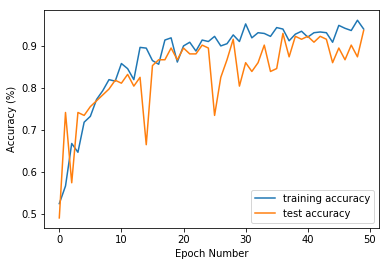

In [9]:
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='test accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

An idication that the model is overfitting the data is when the training accuracy significantly increases about the test accuracy.  This means that while the model parameters adequately characterize the training set, the model will not predict as well as well with unseen test data that falls outside the training set.  In our model, overfitting is does not seem to be occuring.  While the the test accuracy always remains below the training accuracy, it does not so by a significant amount.

## 4. Model evaluation (20 pts)

Now that you have a trained model, make a prediction for the test set (model.predict is a useful function for this).  **Compute and display a confusion matrix.  Select and display an example from the test set of a true positive, a true negative, a false positive, and a false negative.  Speculate on the reasons behind misclassification for images that your model predicted incorrectly**.

In [10]:
predict = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

predict[predict < 0.5] = 0
predict[predict > 0.5] = 1

confusion = confusion_matrix(y_test,predict)
print (confusion)



[[72  3]
 [ 6 62]]


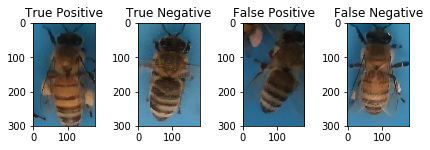

In [23]:
true_pos = np.array([])
false_pos = np.array([])
false_neg = np.array([])
true_neg = np.array([])
for i in  range(len(y_test)):
    if int(y_test[i])==int(predict[i]):
        true_pos = np.append(true_pos, int(i))
    if int(y_test[i])==1 and int(predict[i])==0:
        false_neg = np.append(false_neg, int(i))
    if int(y_test[i])==0 and int(predict[i])==1:
        false_pos = np.append(false_pos, int(i))
    if int(y_test[i])==0 and int(predict[i])==0:
        true_neg = np.append(true_neg, int(i))
        

           
fig, axes = plt.subplots(1,4)
plt.sca(axes[0])
plt.imshow(X_test[int(np.random.choice(true_pos))])
plt.title('True Positive'.format(k, y[k]))

plt.sca(axes[1])
plt.imshow(X_test[int(np.random.choice(true_neg))])
plt.title('True Negative'.format(k, y[k]));

plt.sca(axes[2])
plt.imshow(X_test[int(np.random.choice(false_pos))])
plt.title('False Positive'.format(k, y[k]));

plt.sca(axes[3])
plt.imshow(X_test[int(np.random.choice(false_neg))])
plt.title('False Negative'.format(k, y[k]));

fig.tight_layout()
plt.show()

One of the clear differences in the misclassified examples is the location of the bee relative to the center of the frame.  Wether the bee is in the center or not has a large effect on the percieved size of the bee. So, a potential important feature that has a large weight in the clustering is the size of the bee, which can be distorted based on the position of the bee on the frame.  Furthermore, the lighting (or lack of due to shadows) seems to have an effect on misclassified examples.